In [84]:
import re
from Bio import SeqIO
from collections import defaultdict
import logomaker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [163]:
def footprint(seq):
    znf1 = re.compile('C..C.{8,15}H...H')
    fp_index = (-13, -12, -10, -9, -7, -6)
    hits = re.findall(znf1, seq)
    
    footprint = []
    for hit in hits:
        footprint.append(''.join([hit[i] for i in fp_index]))
    return tuple(footprint)

def extract_footprints(min_znfs=3):
    footprints = {}
    for record in SeqIO.parse('../data/seqs/cypriniformes_augustus_finz.fa',
                              'fasta'):
        fp = footprint(str(record.seq))
        if len(fp) >= min_znfs:
            footprints[record.id] = fp
    return footprints

def extract_fingers():
    znf_pat = re.compile('C.{2,4}C.{8,15}H.{3,5}H')
    species_pat = re.compile('([A-z]+_[a-z]+)_.*')
    fingers = defaultdict(list)
    
    for record in SeqIO.parse('../data/seqs/cypriniformes_augustus_finz.fa',
                              'fasta'):
        species = re.match(species_pat, record.id).group(1)
        hits = re.findall(znf_pat, str(record.seq))
        for hit in hits:
            fingers[species].append(hit)
    return fingers

def entropy(position):
    return -sum(position.apply(lambda x: x*np.log2(x)))
    

In [155]:
fingers = extract_fingers()

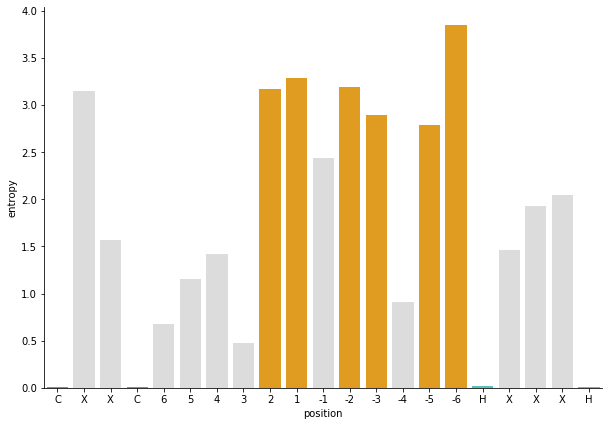

In [162]:
fingers21 = [f for fub in fingers.values() for f in fub if len(f) == 21]
mat_df = logomaker.alignment_to_matrix(fingers21, to_type='probability').T
data = defaultdict(list)
for col in mat_df.columns:
    data['position'].append(col)
    data['entropy'].append(entropy(mat_df[col]))
znf_df = pd.DataFrame(data)
znf_df['pos_labels'] = ['C', 'X', 'X', 'C', 6, 5, 4, 3, 2, 1, -1, -2, -3, -4, -5, -6, 'H', 'X', 'X', 'X', 'H']
znf_df['colours'] = ['deepskyblue', 'gainsboro', 'gainsboro', 'deepskyblue', 
                     'gainsboro', 'gainsboro', 'gainsboro', 'gainsboro', 'orange', 'orange',
                     'gainsboro', 'orange', 'orange', 'gainsboro', 'orange', 'orange',
                     'mediumturquoise', 'gainsboro', 'gainsboro', 'gainsboro', 'mediumturquoise']

 
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=znf_df, x='position', y='entropy', palette=znf_df.colours)
ax.set_xticklabels(znf_df.pos_labels)
sns.despine()
plt.show()

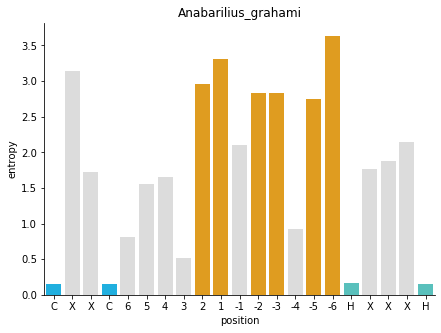

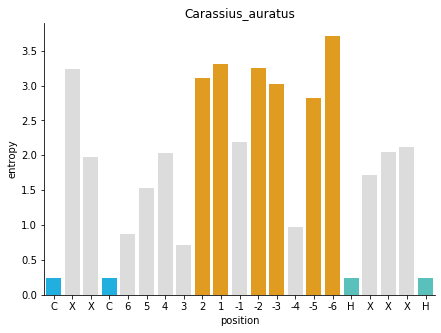

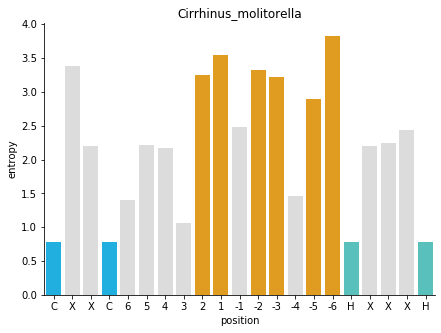

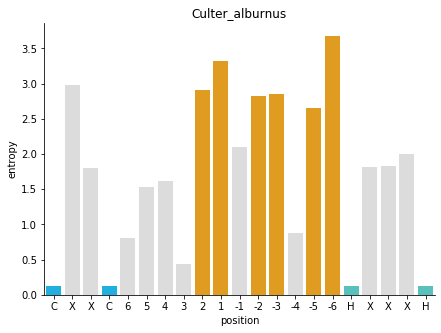

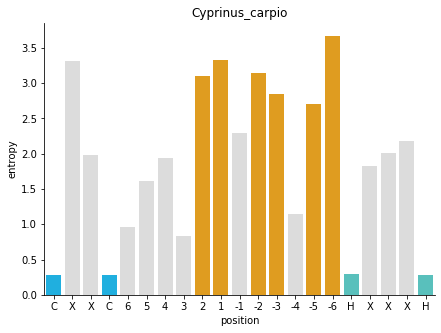

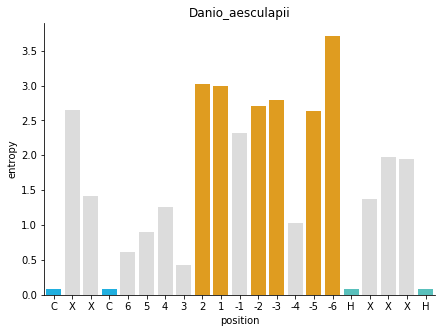

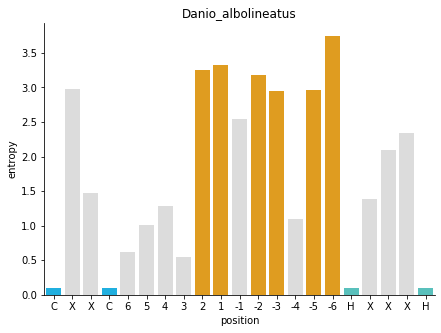

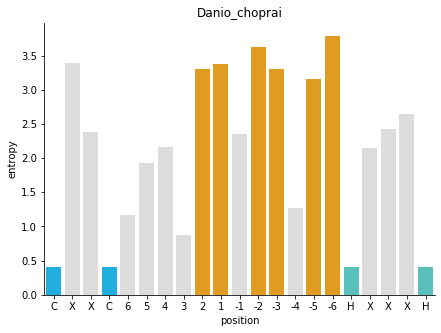

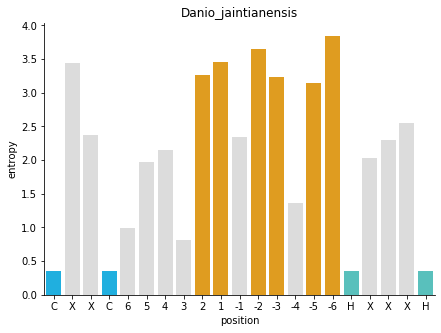

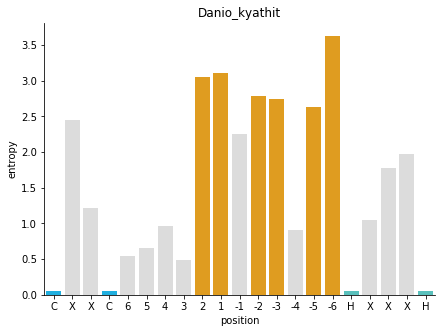

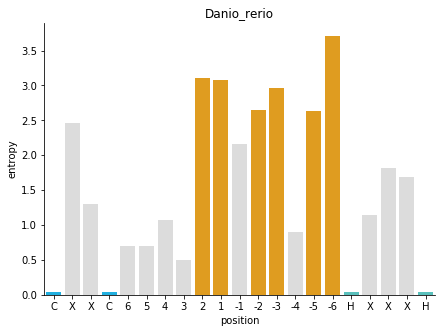

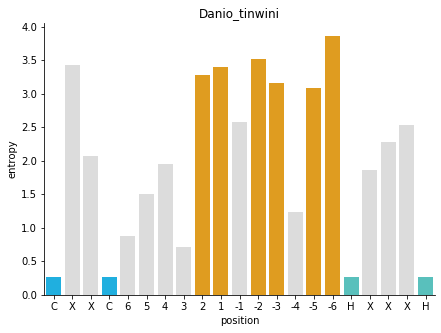

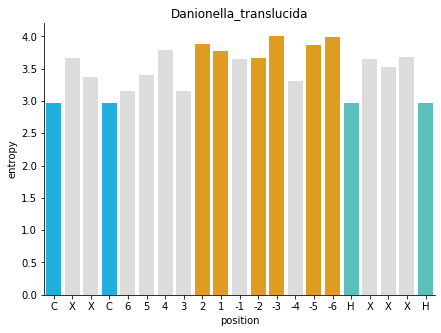

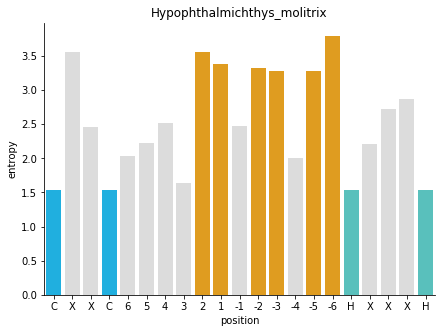

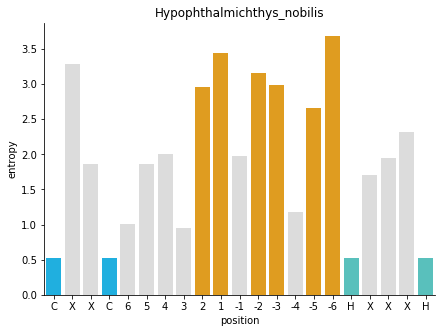

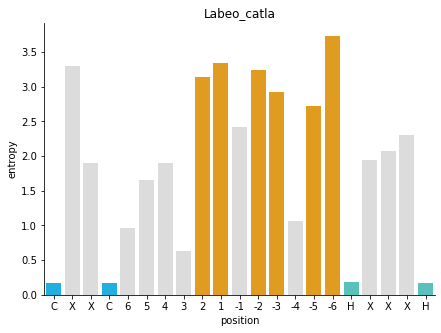

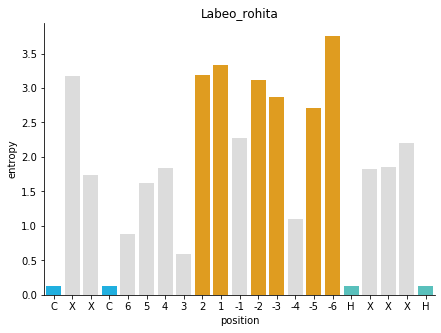

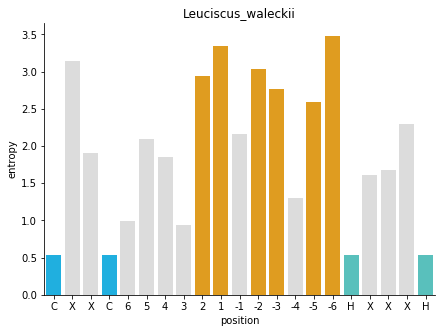

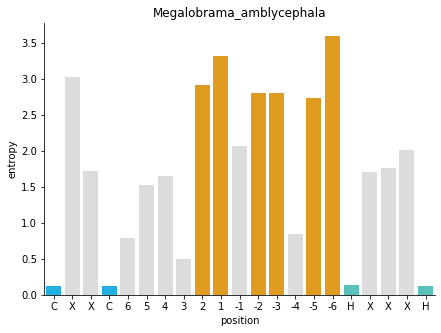

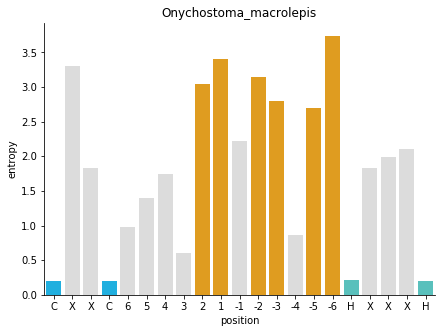

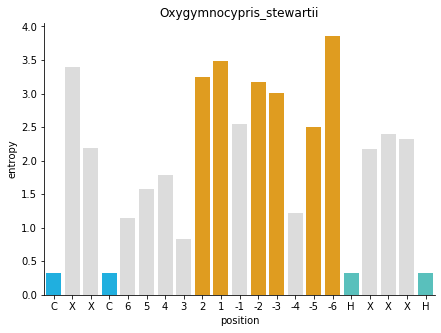

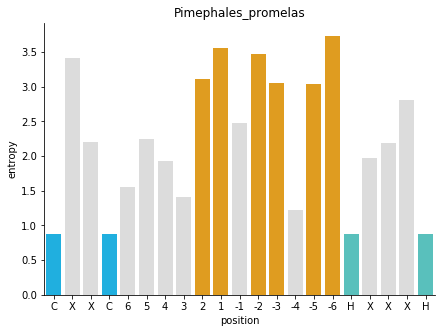

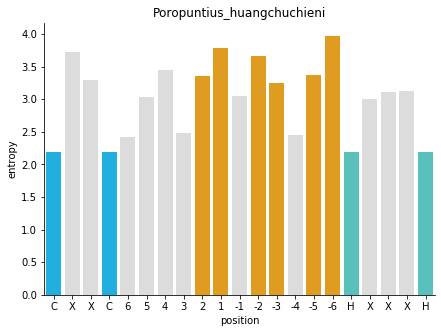

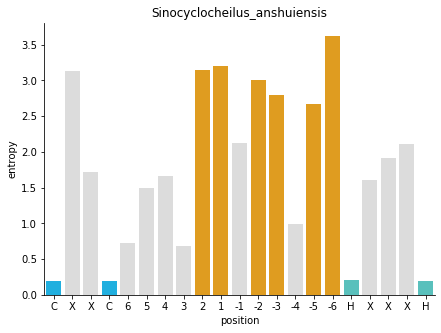

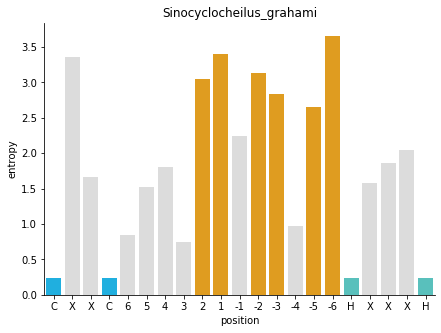

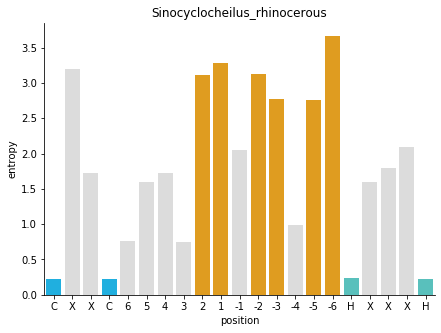

In [157]:
for species in fingers:
    fingers21 = [f for f in fingers[species] if len(f) == 21]
    mat_df = logomaker.alignment_to_matrix(fingers21, to_type='probability').T
    data = defaultdict(list)
    for col in mat_df.columns:
        data['position'].append(col)
        data['entropy'].append(entropy(mat_df[col]))
    znf_df = pd.DataFrame(data)
    znf_df['pos_labels'] = ['C', 'X', 'X', 'C', 6, 5, 4, 3, 2, 1, -1, -2, -3, -4, -5, -6, 'H', 'X', 'X', 'X', 'H']
    znf_df['colours'] = ['deepskyblue', 'gainsboro', 'gainsboro', 'deepskyblue', 
                         'gainsboro', 'gainsboro', 'gainsboro', 'gainsboro', 'orange', 'orange',
                         'gainsboro', 'orange', 'orange', 'gainsboro', 'orange', 'orange',
                         'mediumturquoise', 'gainsboro', 'gainsboro', 'gainsboro', 'mediumturquoise']


    fig, ax = plt.subplots(figsize=(7, 5))
    sns.barplot(data=znf_df, x='position', y='entropy', palette=znf_df.colours)
    ax.set_xticklabels(znf_df.pos_labels)
    ax.set_title(species)
    sns.despine()
    plt.show()

(0.1, 400)

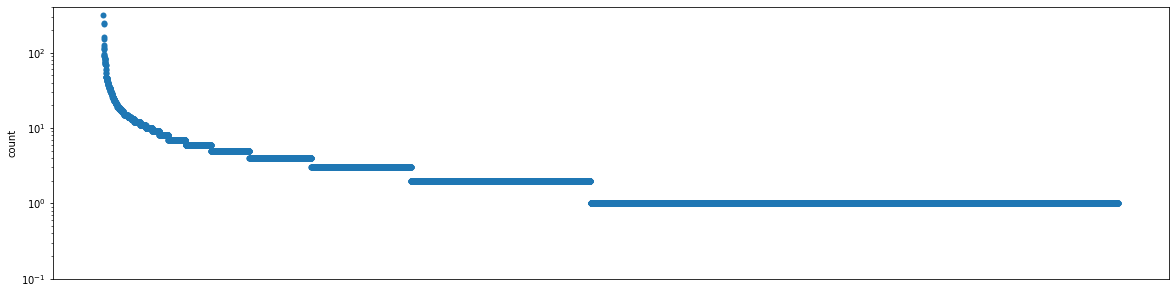

In [189]:
fps = extract_footprints()
all_fps = defaultdict(int)
for key, val in fps.items():
    pretty_fp = ','.join(val)
    for i in val:
        all_fps[i] += 1
data = pd.DataFrame({'footprint': [i for i in all_fps.keys()],
                     'count': [all_fps[i] for i in all_fps.keys()]}) \
         .sort_values('count', ascending=False) 

fig, ax = plt.subplots(figsize=(20, 5))
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yscale('log')
sns.scatterplot(data=data, x='footprint', y='count', linewidth=0)
ax.set_ylim((0.1, 400))
# print(all_fps)        
# for i in sorted(all_fps.items(), key=lambda x: x[1]):
#     print(i[0], i[1])
# print(len(all_fps))
# print(sum(all_fps.values()))